In [3]:
import zipfile
import os

zip_file_path = '/content/archive (2).zip'
extract_path = '/content/extracted_data'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"File extracted to {extract_path}")

File extracted to /content/extracted_data


In [4]:
import pandas as pd

# Assuming 'car data.csv' is inside the zip file
file_path = '/content/extracted_data/car data.csv'

try:
    df = pd.read_csv(file_path)
    print(f"Data loaded successfully from {file_path}")
except FileNotFoundError:
    print("Error: The file was not found after extraction. Please check the contents of the zip file.")
    raise SystemExit

print("\n--- Initial Data Head and Column Info ---")
print(df.head())
print(df.info())

Data loaded successfully from /content/extracted_data/car data.csv

--- Initial Data Head and Column Info ---
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 

In [5]:
df = df.drop('Car_Name', axis=1)

# Handle Missing/Null values (Check)
print("\n--- Missing Value Check ---")
print(df.isnull().sum())
# The data appears clean, but this check is essential.

# Feature Engineering: Calculate Car Age (a crucial factor in depreciation)
from datetime import datetime
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']
df.drop('Year', axis=1, inplace=True)
print(f"\n'Year' replaced with 'Car_Age' (calculated based on {current_year}).")
print(df.head())



--- Missing Value Check ---
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

'Year' replaced with 'Car_Age' (calculated based on 2025).
   Selling_Price  Present_Price  Driven_kms Fuel_Type Selling_type  \
0           3.35           5.59       27000    Petrol       Dealer   
1           4.75           9.54       43000    Diesel       Dealer   
2           7.25           9.85        6900    Petrol       Dealer   
3           2.85           4.15        5200    Petrol       Dealer   
4           4.60           6.87       42450    Diesel       Dealer   

  Transmission  Owner  Car_Age  
0       Manual      0       11  
1       Manual      0       12  
2       Manual      0        8  
3       Manual      0       14  
4       Manual      0       11  



--- Distribution of Car Selling Price ---


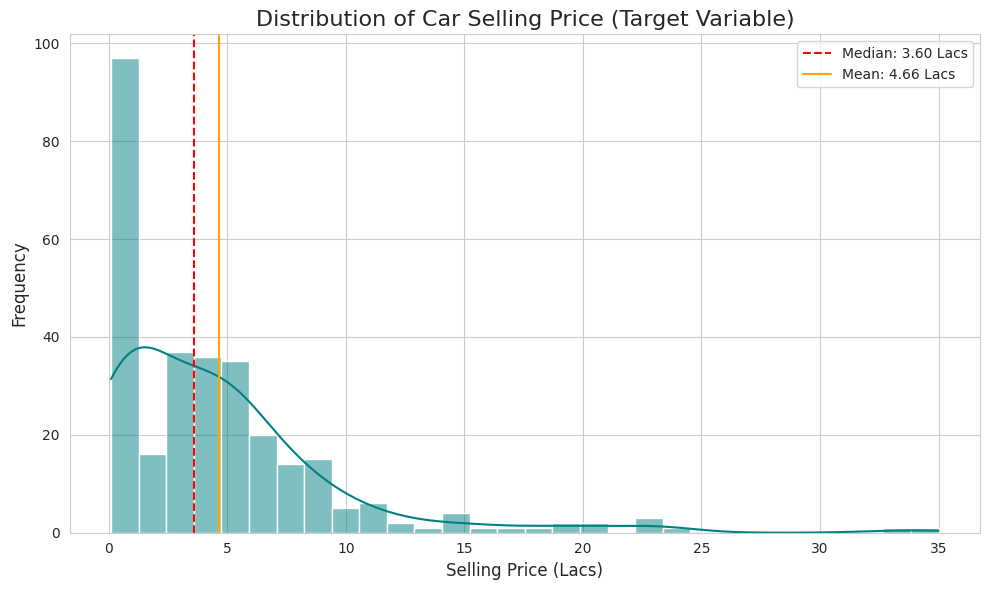

In [6]:
print("\n--- Distribution of Car Selling Price ---")

# A Distribution Plot (Distplot/Histogram) shows the frequency of prices.
plt.figure(figsize=(10, 6))
sns.histplot(
    df['Selling_Price'],
    kde=True,
    bins=30,
    color='teal'
)

# Add median and mean lines for context
median_price = df['Selling_Price'].median()
mean_price = df['Selling_Price'].mean()

plt.axvline(median_price, color='red', linestyle='--', label=f'Median: {median_price:.2f} Lacs')
plt.axvline(mean_price, color='orange', linestyle='-', label=f'Mean: {mean_price:.2f} Lacs')

plt.title('Distribution of Car Selling Price (Target Variable)', fontsize=16)
plt.xlabel('Selling Price (Lacs)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show() #



--- Relationship between Price, Age, and Present Price ---


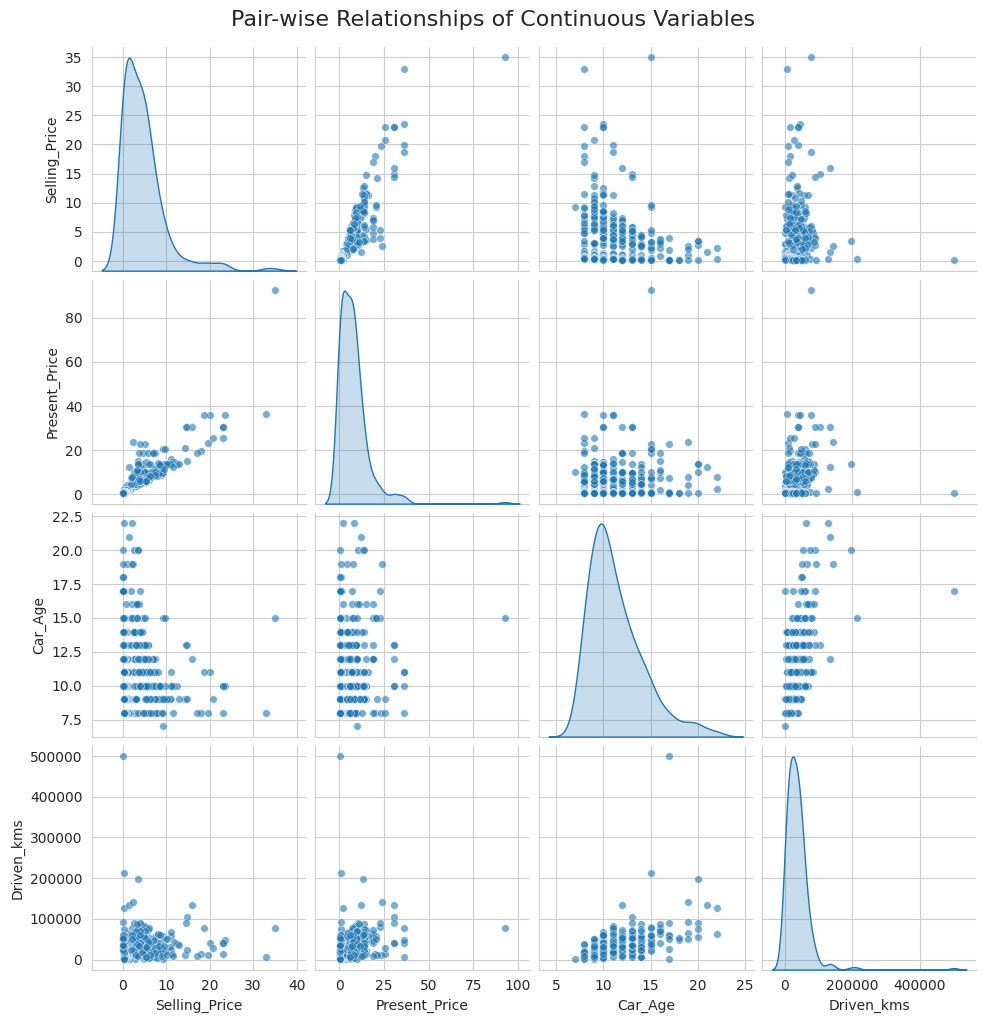

In [7]:
print("\n--- Relationship between Price, Age, and Present Price ---")

# Use a PairPlot to visualize scatter plots for all pairs of continuous variables
# Focus on how 'Selling_Price' correlates with 'Present_Price' and 'Car_Age'.
sns.pairplot(
    df[['Selling_Price', 'Present_Price', 'Car_Age', 'Driven_kms']],
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 30}
)
plt.suptitle('Pair-wise Relationships of Continuous Variables', y=1.02, fontsize=16)
plt.show() #



--- Impact of Categorical Features on Selling Price ---


/tmp/ipython-input-564960610.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], x='Fuel_Type', y='Selling_Price', data=df, palette='Set2')
/tmp/ipython-input-564960610.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 1], x='Selling_type', y='Selling_Price', data=df, palette='Set1')
/tmp/ipython-input-564960610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 0], x='Transmission', y='Selling_Price', data=df, palette='Paired')
/tmp/ipython-input-564960610.py:25: FutureWarning: 

Passing `palette` w

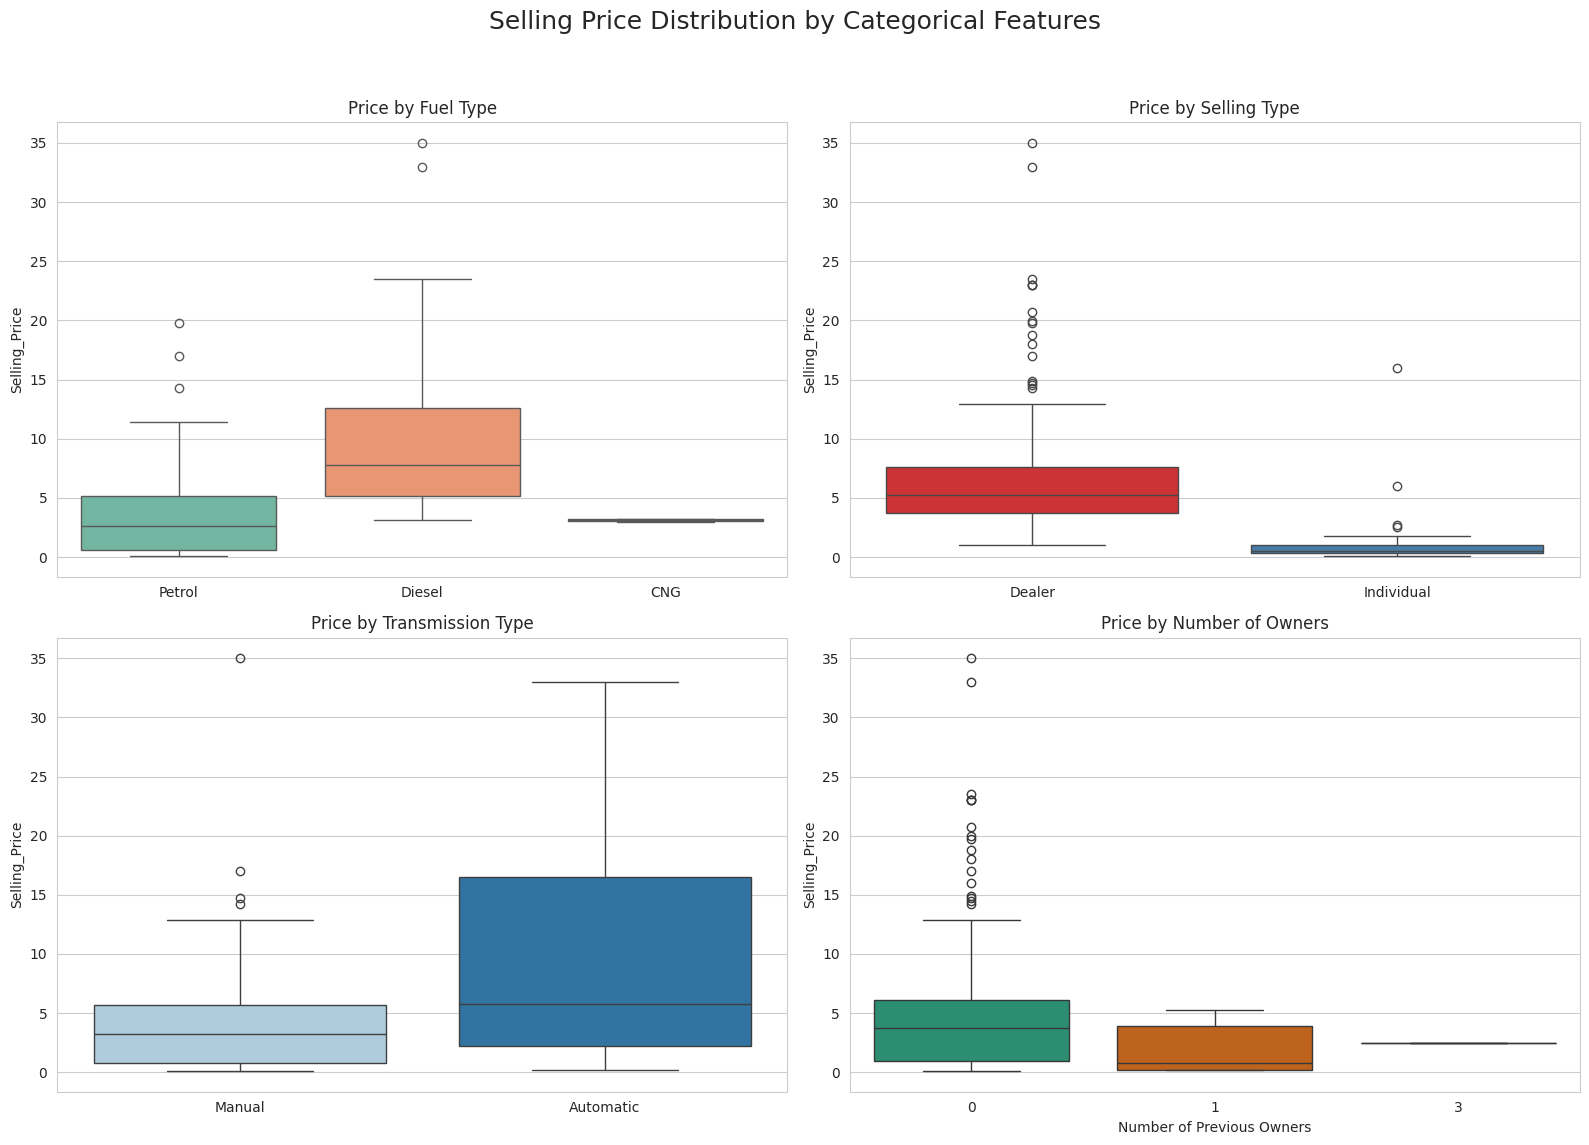

In [8]:
print("\n--- Impact of Categorical Features on Selling Price ---")

# Categorical features: Fuel_Type, Selling_type, Transmission, Owner
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Selling Price Distribution by Categorical Features', fontsize=18)

# 1. Fuel Type
sns.boxplot(ax=axes[0, 0], x='Fuel_Type', y='Selling_Price', data=df, palette='Set2')
axes[0, 0].set_title('Price by Fuel Type')
axes[0, 0].set_xlabel('')

# 2. Selling Type (Dealer vs Individual)
sns.boxplot(ax=axes[0, 1], x='Selling_type', y='Selling_Price', data=df, palette='Set1')
axes[0, 1].set_title('Price by Selling Type')
axes[0, 1].set_xlabel('')

# 3. Transmission Type (Manual vs Automatic)
sns.boxplot(ax=axes[1, 0], x='Transmission', y='Selling_Price', data=df, palette='Paired')
axes[1, 0].set_title('Price by Transmission Type')
axes[1, 0].set_xlabel('')

# 4. Owner (0, 1, 3 etc - Number of previous owners)
# Convert Owner to categorical for meaningful box plot
df['Owner_Cat'] = df['Owner'].astype('category')
sns.boxplot(ax=axes[1, 1], x='Owner_Cat', y='Selling_Price', data=df, palette='Dark2')
axes[1, 1].set_title('Price by Number of Owners')
axes[1, 1].set_xlabel('Number of Previous Owners')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() #


--- Feature Correlation Heatmap ---


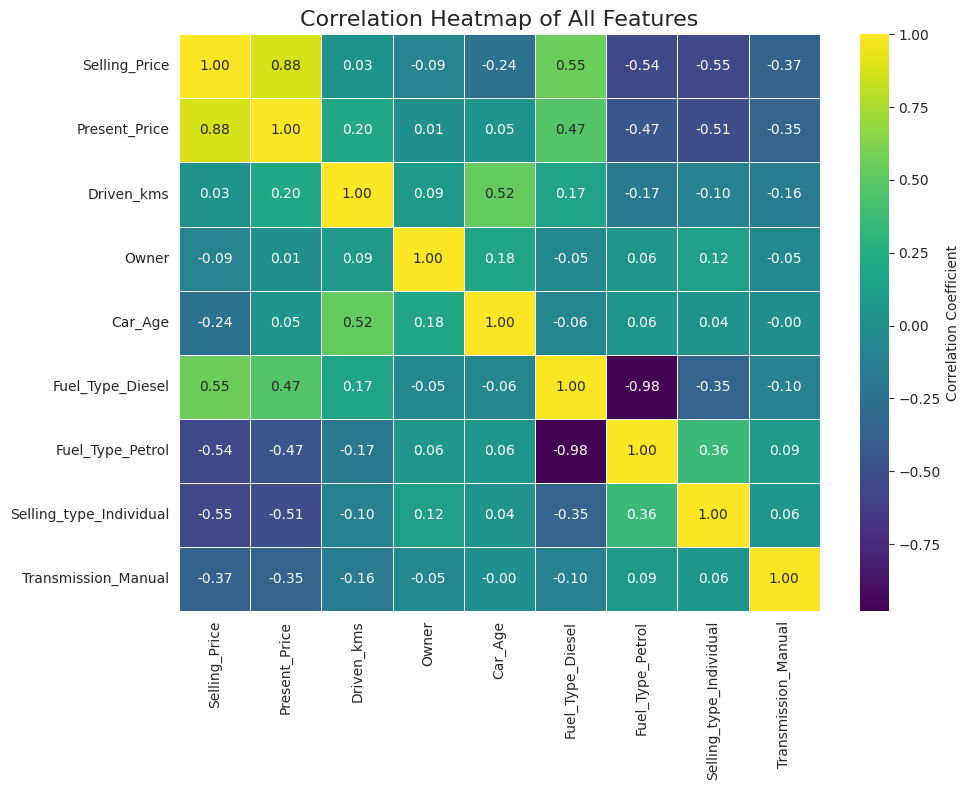

In [9]:
print("\n--- Feature Correlation Heatmap ---")

# Convert categorical data to numerical representation for correlation calculation
df_encoded = pd.get_dummies(df.drop('Owner_Cat', axis=1), drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
# Use a Heatmap to visualize correlation coefficients between all features
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='viridis',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.tight_layout()
plt.show() #



--- Price vs. Kilometers Driven (Regression Plot) ---


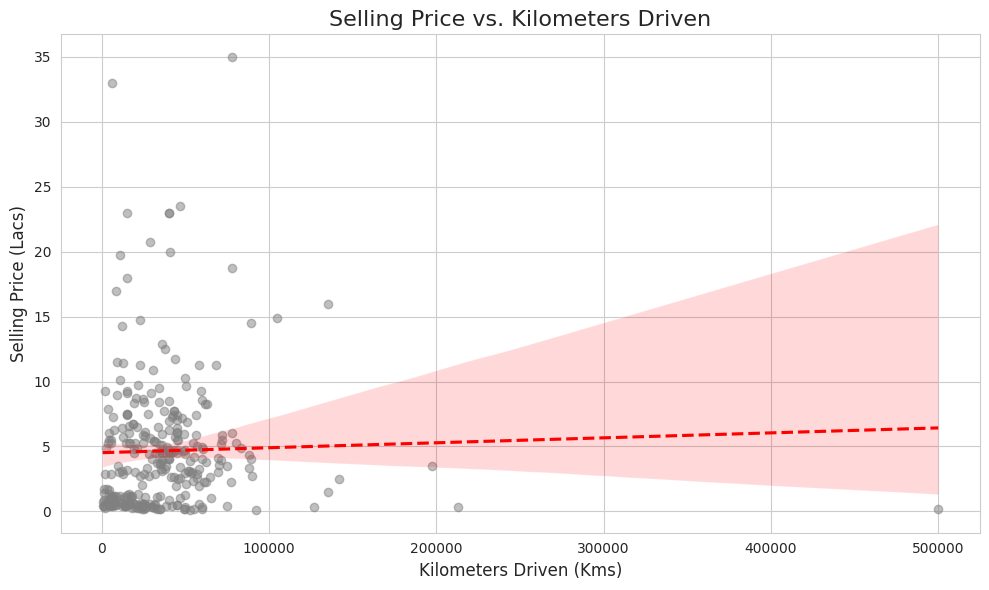

In [10]:
print("\n--- Price vs. Kilometers Driven (Regression Plot) ---")

plt.figure(figsize=(10, 6))
# Use a Scatter Plot with a built-in Regression Line to show the trend
sns.regplot(
    data=df,
    x='Driven_kms',
    y='Selling_Price',
    scatter_kws={'alpha':0.5, 'color':'gray'},
    line_kws={'color':'red', 'linestyle':'--'}
)

plt.title('Selling Price vs. Kilometers Driven', fontsize=16)
plt.xlabel('Kilometers Driven (Kms)', fontsize=12)
plt.ylabel('Selling Price (Lacs)', fontsize=12)
plt.tight_layout()
plt.show() #



--- Distribution of Log-Transformed Selling Price ---


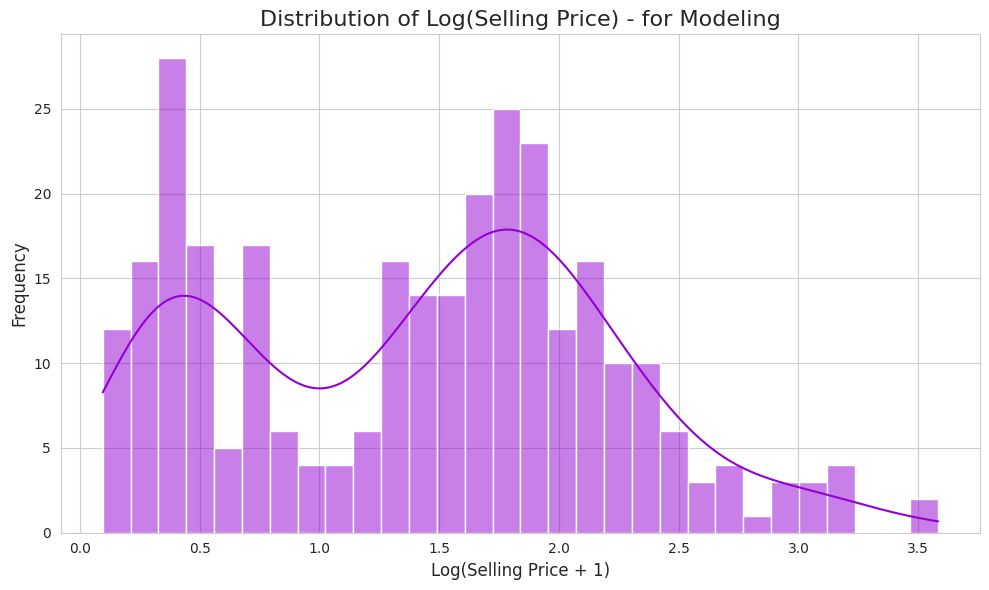

In [11]:
print("\n--- Distribution of Log-Transformed Selling Price ---")

# Apply Log transformation (using log1p which is log(1+x) to handle zeros/near-zeros safely)
df['Log_Selling_Price'] = np.log1p(df['Selling_Price'])

plt.figure(figsize=(10, 6))
# Distribution Plot of the new log-transformed variable
sns.histplot(
    df['Log_Selling_Price'],
    kde=True,
    bins=30,
    color='darkviolet'
)
plt.title('Distribution of Log(Selling Price) - for Modeling', fontsize=16)
plt.xlabel('Log(Selling Price + 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show() #


In [12]:
print("\n--- Selling Price vs. Present Price by Fuel Type and Car Age ---")

# Use Plotly for an interactive, informative scatter plot
fig = px.scatter(
    df,
    x='Present_Price',
    y='Selling_Price',
    color='Fuel_Type',
    size='Car_Age', # Size of the bubble represents Car Age (depreciation)
    hover_data=['Car_Age', 'Driven_kms'],
    title='Selling Price vs. Present Price, Grouped by Fuel Type (Bubble Size = Car Age)'
)
fig.update_layout(
    height=600,
    xaxis_title='Present Price (Lacs) - Cost of Car When New',
    yaxis_title='Selling Price (Lacs) - Resale Price'
)
fig.show() #



--- Selling Price vs. Present Price by Fuel Type and Car Age ---



--- Present Price Distribution by Transmission Type (Violin Plot) ---


/tmp/ipython-input-4113965159.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




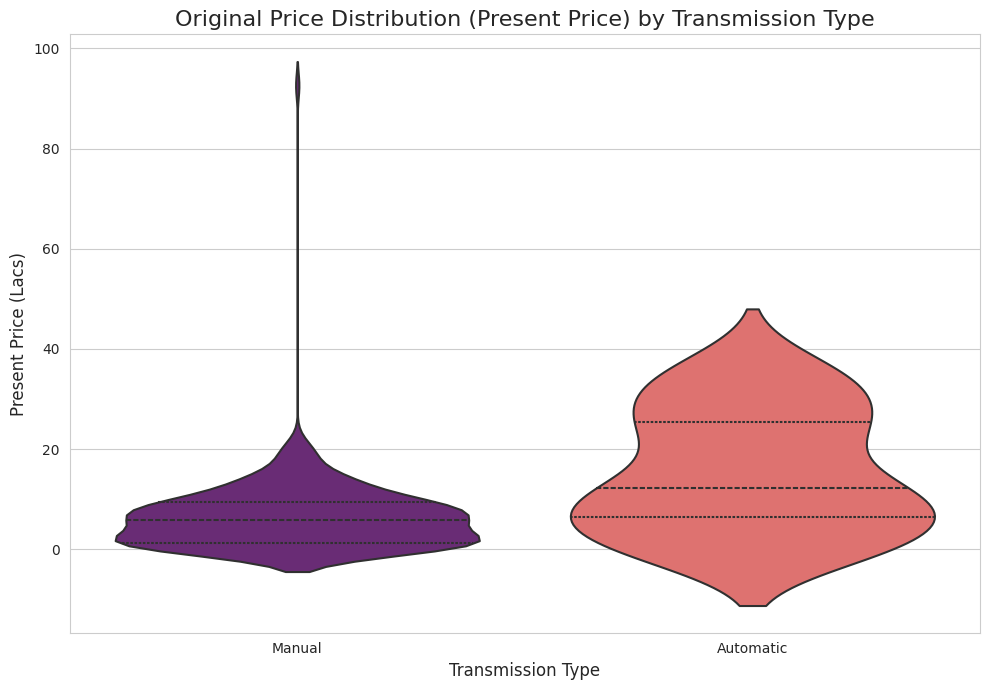

In [13]:
print("\n--- Present Price Distribution by Transmission Type (Violin Plot) ---")

plt.figure(figsize=(10, 7))
# A Violin Plot combines the Box Plot with a kernel density estimate, showing the full distribution shape
sns.violinplot(
    data=df,
    x='Transmission',
    y='Present_Price',
    palette='magma',
    inner='quartile',
    linewidth=1.5
)
plt.title('Original Price Distribution (Present Price) by Transmission Type', fontsize=16)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Present Price (Lacs)', fontsize=12)
plt.tight_layout()
plt.show() #

In [15]:
print("\n--- Market Segment Analysis: Selling Type Hierarchy (Sunburst Plot) ---")

# A Sunburst Plot is excellent for visualizing hierarchical distribution: Selling Type -> Fuel Type
fig = px.sunburst(
    df,
    path=['Selling_type', 'Fuel_Type', 'Owner_Cat'],
    values='Selling_Price', # Use Selling Price to weight the segments (size of slice)
    color='Car_Age', # Color by Car Age to see where older cars are concentrated
    color_continuous_scale='Plasma', # Use a vibrant continuous scale
    title='Contribution to Total Selling Price by Market Segment Hierarchy (Color by Car Age)'
)
fig.update_layout(height=600, margin=dict(t=50, l=0, r=0, b=0))
fig.show() #


--- Market Segment Analysis: Selling Type Hierarchy (Sunburst Plot) ---


/usr/local/lib/python3.12/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




--- Final EDA Dashboard Summary of Key Insights ---


/tmp/ipython-input-4084890608.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-4084890608.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



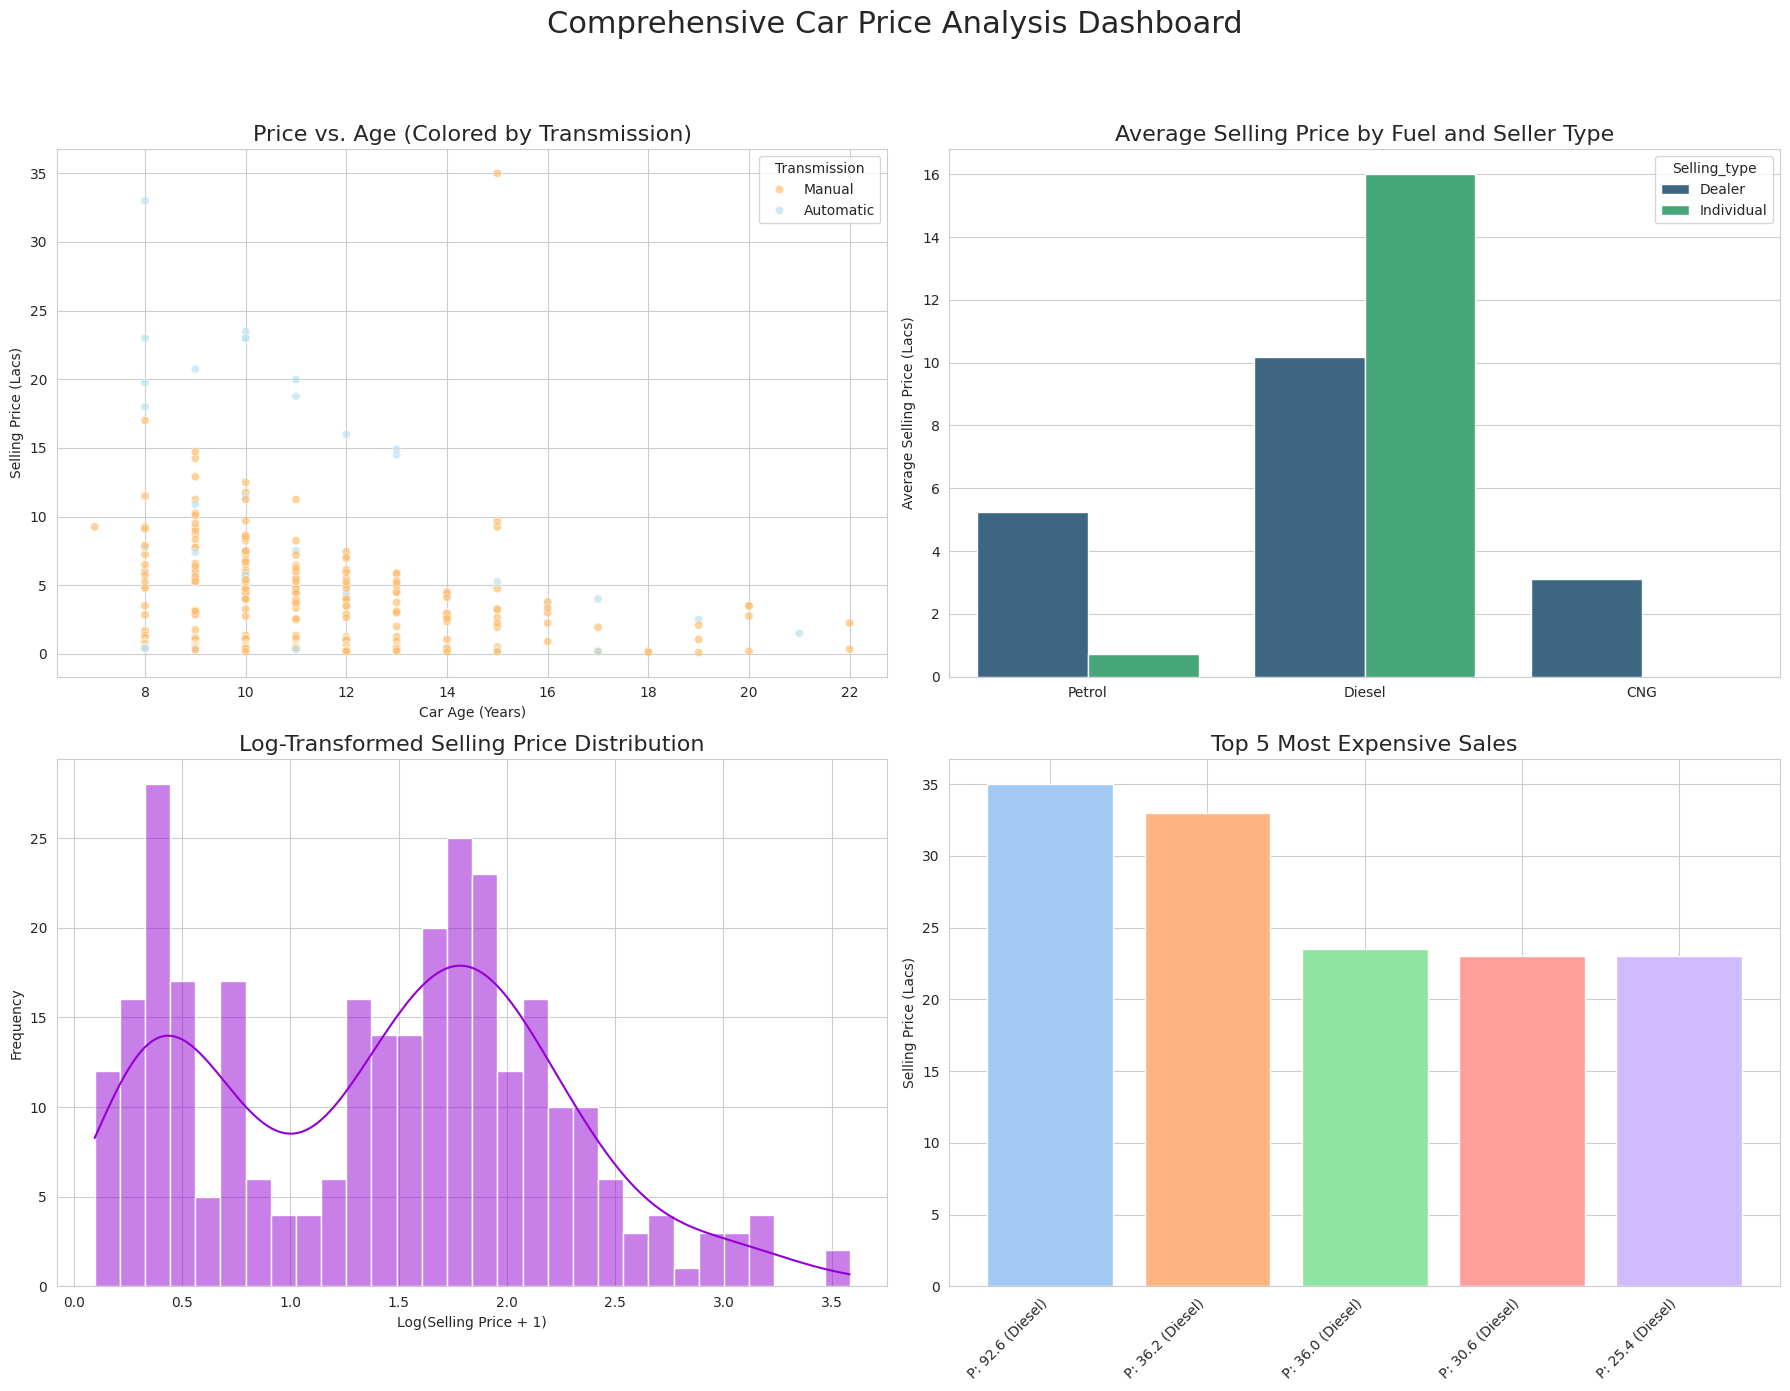

In [17]:
print("\n--- Final EDA Dashboard Summary of Key Insights ---")

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Comprehensive Car Price Analysis Dashboard', fontsize=22, y=1.02)

# Plot 1: Age vs. Selling Price (Top-Left)
sns.scatterplot(ax=axes[0, 0], data=df, x='Car_Age', y='Selling_Price', hue='Transmission', palette='RdYlBu', alpha=0.7)
axes[0, 0].set_title('Price vs. Age (Colored by Transmission)', fontsize=16)
axes[0, 0].set_xlabel('Car Age (Years)')
axes[0, 0].set_ylabel('Selling Price (Lacs)')

# Plot 2: Price by Fuel Type and Dealer vs Individual (Top-Right)
sns.barplot(ax=axes[0, 1], data=df, x='Fuel_Type', y='Selling_Price', hue='Selling_type', palette='viridis', ci=None)
axes[0, 1].set_title('Average Selling Price by Fuel and Seller Type', fontsize=16)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Average Selling Price (Lacs)')

# Plot 3: Log-Transformed Price Distribution (Bottom-Left)
sns.histplot(df['Log_Selling_Price'], ax=axes[1, 0], kde=True, bins=30, color='darkviolet')
axes[1, 0].set_title('Log-Transformed Selling Price Distribution', fontsize=16)
axes[1, 0].set_xlabel('Log(Selling Price + 1)')
axes[1, 0].set_ylabel('Frequency')

# Plot 4: Top 5 Highest Price Cars (Bottom-Right)
top_5 = df.nlargest(5, 'Selling_Price')[['Selling_Price', 'Present_Price', 'Fuel_Type']]
top_5_data = top_5['Selling_Price']
top_5_labels = [f"P: {pp:.1f} ({ft})" for pp, ft in zip(top_5['Present_Price'], top_5['Fuel_Type'])]
axes[1, 1].bar(top_5_labels, top_5_data, color=sns.color_palette('pastel', 5))
axes[1, 1].set_title('Top 5 Most Expensive Sales', fontsize=16)
axes[1, 1].set_ylabel('Selling Price (Lacs)')
axes[1, 1].set_xticklabels(top_5_labels, rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show() #